# Inverse great circle distance spherical interpolation
## Ryan Marren


In [1]:
import sys
sys.path.append('../src/')


In [2]:
from preprocessing.interp import gc_invdist_interp, fit_sphere
import numpy as np
import utils.plots as plots

In [3]:
times = np.linspace(0, 1, 1000)
cos = np.cos(2 * np.pi * times)
data = np.column_stack([cos] * 5)
data = np.expand_dims(data, 2)

In [4]:
from random import random as rnd
def sp_to_crt(theta, phi, r, rad):
    x = rad * np.sin(theta) * np.cos(phi)
    y = rad * np.sin(theta) * np.sin(phi)
    z = rad * np.cos(theta)
    return x,y,z
def rand_coord():
    return [rnd() * 180, rnd() * 90, 1]
coords = np.asarray([rand_coord() for _ in xrange(5)])
coords = np.expand_dims(coords, 2)
crt = np.asarray(map(lambda x: sp_to_crt(*x, rad = 1),coords))

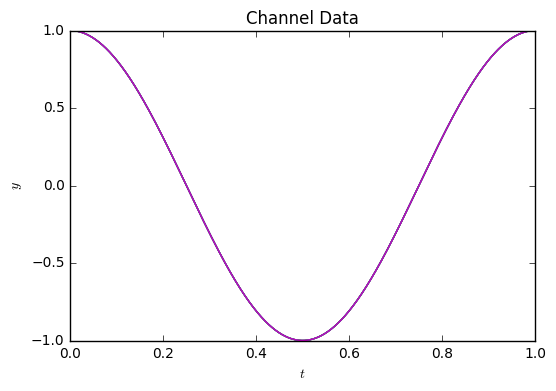

../src/preprocessing/interp.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  gcord = coords[ind]


IndexError: index 151 is out of bounds for axis 0 with size 5

In [5]:
plots.plot_timeseries(data = data,
                      time = times,
                      selector = "all",
                      title = "Channel Data",
                      xlab = r'$t$',
                      ylab = r'$y$')
int_coord = list(rand_coord())[:-1]

interpolated = gc_invdist_interp(data, int_coord, coords, 1, 5)[0]
interpolated = interpolated.reshape(len(interpolated), 1, 1)
plots.plot_timeseries(data = interpolated,
                      time = times,
                      selector = "all",
                      title = "Interpolated",
                      xlab = r'$t$',
                      ylab = r'$y$')

In [ ]:
nmbs = [rnd() for _ in xrange(5)]
data = np.column_stack(map(lambda x: np.repeat(x, len(times)) ,nmbs))
data = np.expand_dims(data, 2)

In [ ]:
plots.plot_timeseries(data = data,
                      time = times,
                      selector = "all",
                      title = "Channel Data",
                      xlab = r'$t$',
                      ylab = r'$y$')
int_coord = list(rand_coord())[:-1]

interpolated = gc_invdist_interp(data, int_coord, coords, 1, 5)[0]
interpolated = interpolated.reshape(len(interpolated), 1, 1)
plots.plot_timeseries(data = interpolated,
                      time = times,
                      selector = "all",
                      title = "Interpolated",
                      xlab = r'$t$',
                      ylab = r'$y$')


In [ ]:
import utils.get_data as gd
import os
os.chdir('/home/ryan/Documents/nd/orange-panda/pipeline/src/')
pats = gd.get_patients()
fp = gd.get_record(pats[0])
ds = gd.make_h5py_object(fp)
import utils.clean_data as cd
eeg = cd.get_eeg_data(ds)
times = cd.get_times(ds)
coords = np.asarray(cd.get_electrode_coords(ds))
coords = np.expand_dims(coords,2)

In [ ]:
intcoord = (coords[0][0], coords[0][1])
interpolated, inds = gc_invdist_interp(np.expand_dims(eeg, 2), intcoord, coords, fit_sphere(coords), 5)
d = np.column_stack([eeg[:, i] for i in inds])
d = np.column_stack([d, interpolated])
print d.shape
print inds
c = 0
broken = []
for i in range(111):
    if sum(eeg[:, i]**2) == 0:
        c = c + 1
        broken.append(i)
print broken
plots.plot_timeseries(data = d,
                      time = times,
                      selector = "all",
                      title = "Interpolated (blue) electrode with its 5 closest neighbors.",
                      colors = ["red", "red", "red", "red", "red", "blue"],
                      start = 100,
                      end = 2000,
                      skip = 10,
                      xlab = r'$t$, in milliseconds',
                      ylab = r'difference from mean voltage in $mV$')